In [42]:
from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np

In [2]:
Pixel = namedtuple("Pixel", "x y")

In [67]:
class Cave:
    def __init__(self, wallstrings):
        self.walls = self._readwalls(wallstrings)
        xs = [p.x for p in self.walls]
        ys = [p.y for p in self.walls]
        self.xmin = min(xs)
        self.xmax = max(xs)
        self.ymin = 0
        self.ymax = max(ys)
        self.sand = set()
    
    def _readwalls(self, wallstrings):
        walls = set()
        for ws in wallstrings:
            wp = [Pixel(*[int(y) for y in x.split(",")]) for x in ws.split(" -> ")]
            #print(wp)
            for p0, p1 in [wp[i:i+2] for i in range(len(wp)-1)]:
                #print(p0, p1)
                if p0.x == p1.x:
                    ymin, ymax = p0.y, p1.y
                    if ymin > ymax:
                        ymin, ymax = ymax, ymin
                    for y in range(ymin, ymax+1):
                        walls.add(Pixel(p0.x,y))
                elif p0.y == p1.y:
                    xmin, xmax = p0.x, p1.x
                    if xmin > xmax:
                        xmin, xmax = xmax, xmin
                    for x in range(xmin, xmax+1):
                        walls.add(Pixel(x,p0.y))
        return walls
    
    def clear(self):
        self.sand.clear()
    
    def display(self):
        xs = [p.x for p in self.sand] + [p.x for p in self.walls]
        xmin = min(xs)
        xmax = max(xs)
        for y in range(self.ymin, self.ymax+3):
            for x in range(xmin, xmax+1):
                p = Pixel(x, y)
                if p in self.walls:
                    print("#", end="")
                elif p in self.sand:
                    print("o", end="")
                else:
                    print(".", end="")
            print()
            
    def imdisplay(self):
        xs = [p.x for p in self.sand] + [p.x for p in self.walls]
        xmin = min(xs)
        xmax = max(xs)
        data = []
        for y in range(self.ymin, self.ymax+3):
            data.append([])
            for x in range(xmin, xmax+1):
                p = Pixel(x, y)
                if p in self.walls:
                    data[-1].append(1)
                elif p in self.sand:
                    data[-1].append(2)
                else:
                    data[-1].append(0)
        d = np.array(data)
        plt.imshow(d)
            
    def fill1(self, debug=0, part2=False):
        atrest = False
        p = Pixel(500, 0)
        if p in self.sand:
            # filled up
            return None
        while not atrest:
            if p.y > self.ymax+2:
                # fell off the bottom
                return None
            if part2 and p.y+1 == self.ymax+2:
                atrest = True
                break
            nd = Pixel(p.x,   p.y+1)
            nl = Pixel(p.x-1, p.y+1)
            nr = Pixel(p.x+1, p.y+1)
            if nd not in self.walls and nd not in self.sand:
                p = nd
            elif nl not in self.walls and nl not in self.sand:
                p = nl
            elif nr not in self.walls and nr not in self.sand:
                p = nr
            else:
                atrest = True
        
        self.sand.add(p)
        if debug >= 1:
            print()
            self.display()
        return p
    
    def fillall(self, debug=0, part2=False):
        self.clear()
        s = self.fill1(debug=debug, part2=part2)
        while s is not None:
            s = self.fill1(debug=debug, part2=part2)
        return len(self.sand)
            
    @classmethod
    def fromfile(cls, filename):
        out = []
        with open(filename, "r") as fh:
            for l in fh:
                out.append(l.strip())
        return cls(out)

test = Cave.fromfile("test.txt")
test.display()

..........
..........
..........
..........
....#...##
....#...#.
..###...#.
........#.
........#.
#########.
..........
..........


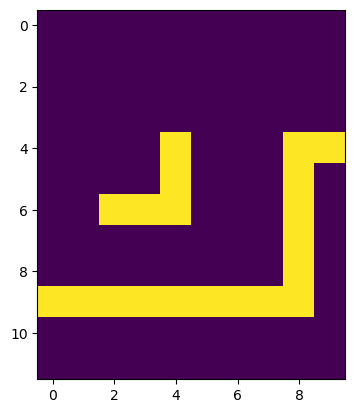

In [68]:
test.imdisplay()

In [69]:
test.fillall()

24

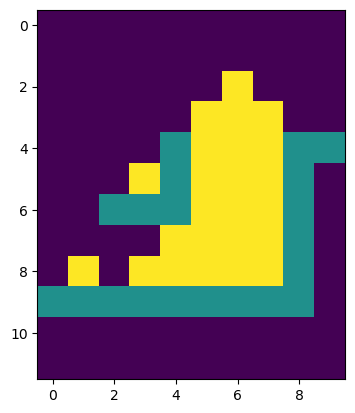

In [70]:
test.imdisplay()

In [72]:
test.fillall(part2=True)

93

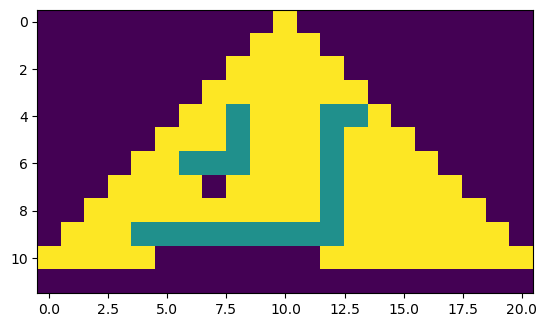

In [71]:
test.imdisplay()

In [73]:
inp = Cave.fromfile("input.txt")
inp.fillall()

715

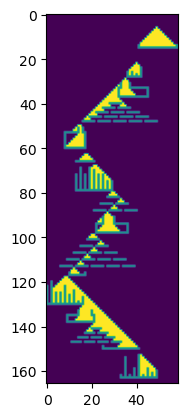

In [74]:
inp.imdisplay()

In [75]:
inp.fillall(part2=True)

25248

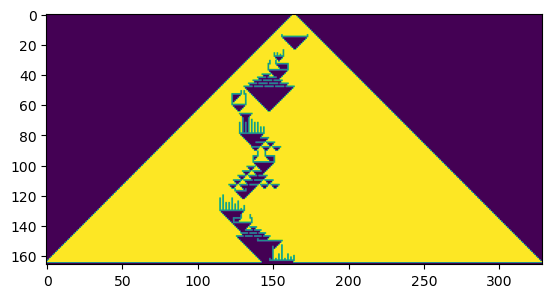

In [76]:
inp.imdisplay()